<div class="alert alert-block alert-success">LDA on a Binary-class dataset: </div>

<div class="alert alert-block alert-success"> 
    <span ><b>Introduction:</b></span>
<ul>
<li>Linear Discriminant Analysis (LDA) is a dimensionality reduction technique. </li>
<li>LDA is used as a pre-processing step.</li>
<li>LDA is a supervised classification technique.</li>
<li>LDA reduce the number of dimensions (variables) in a dataset while retaining as much information as possible.</li>
<li>Linear Discriminant Analysis, or LDA, uses the information from all features to create a new axis and projects the data on the new axis in such a way as to minimizes the variance and maximizes the distance between the means of the two classes.
    </li>
</ul>
</div>

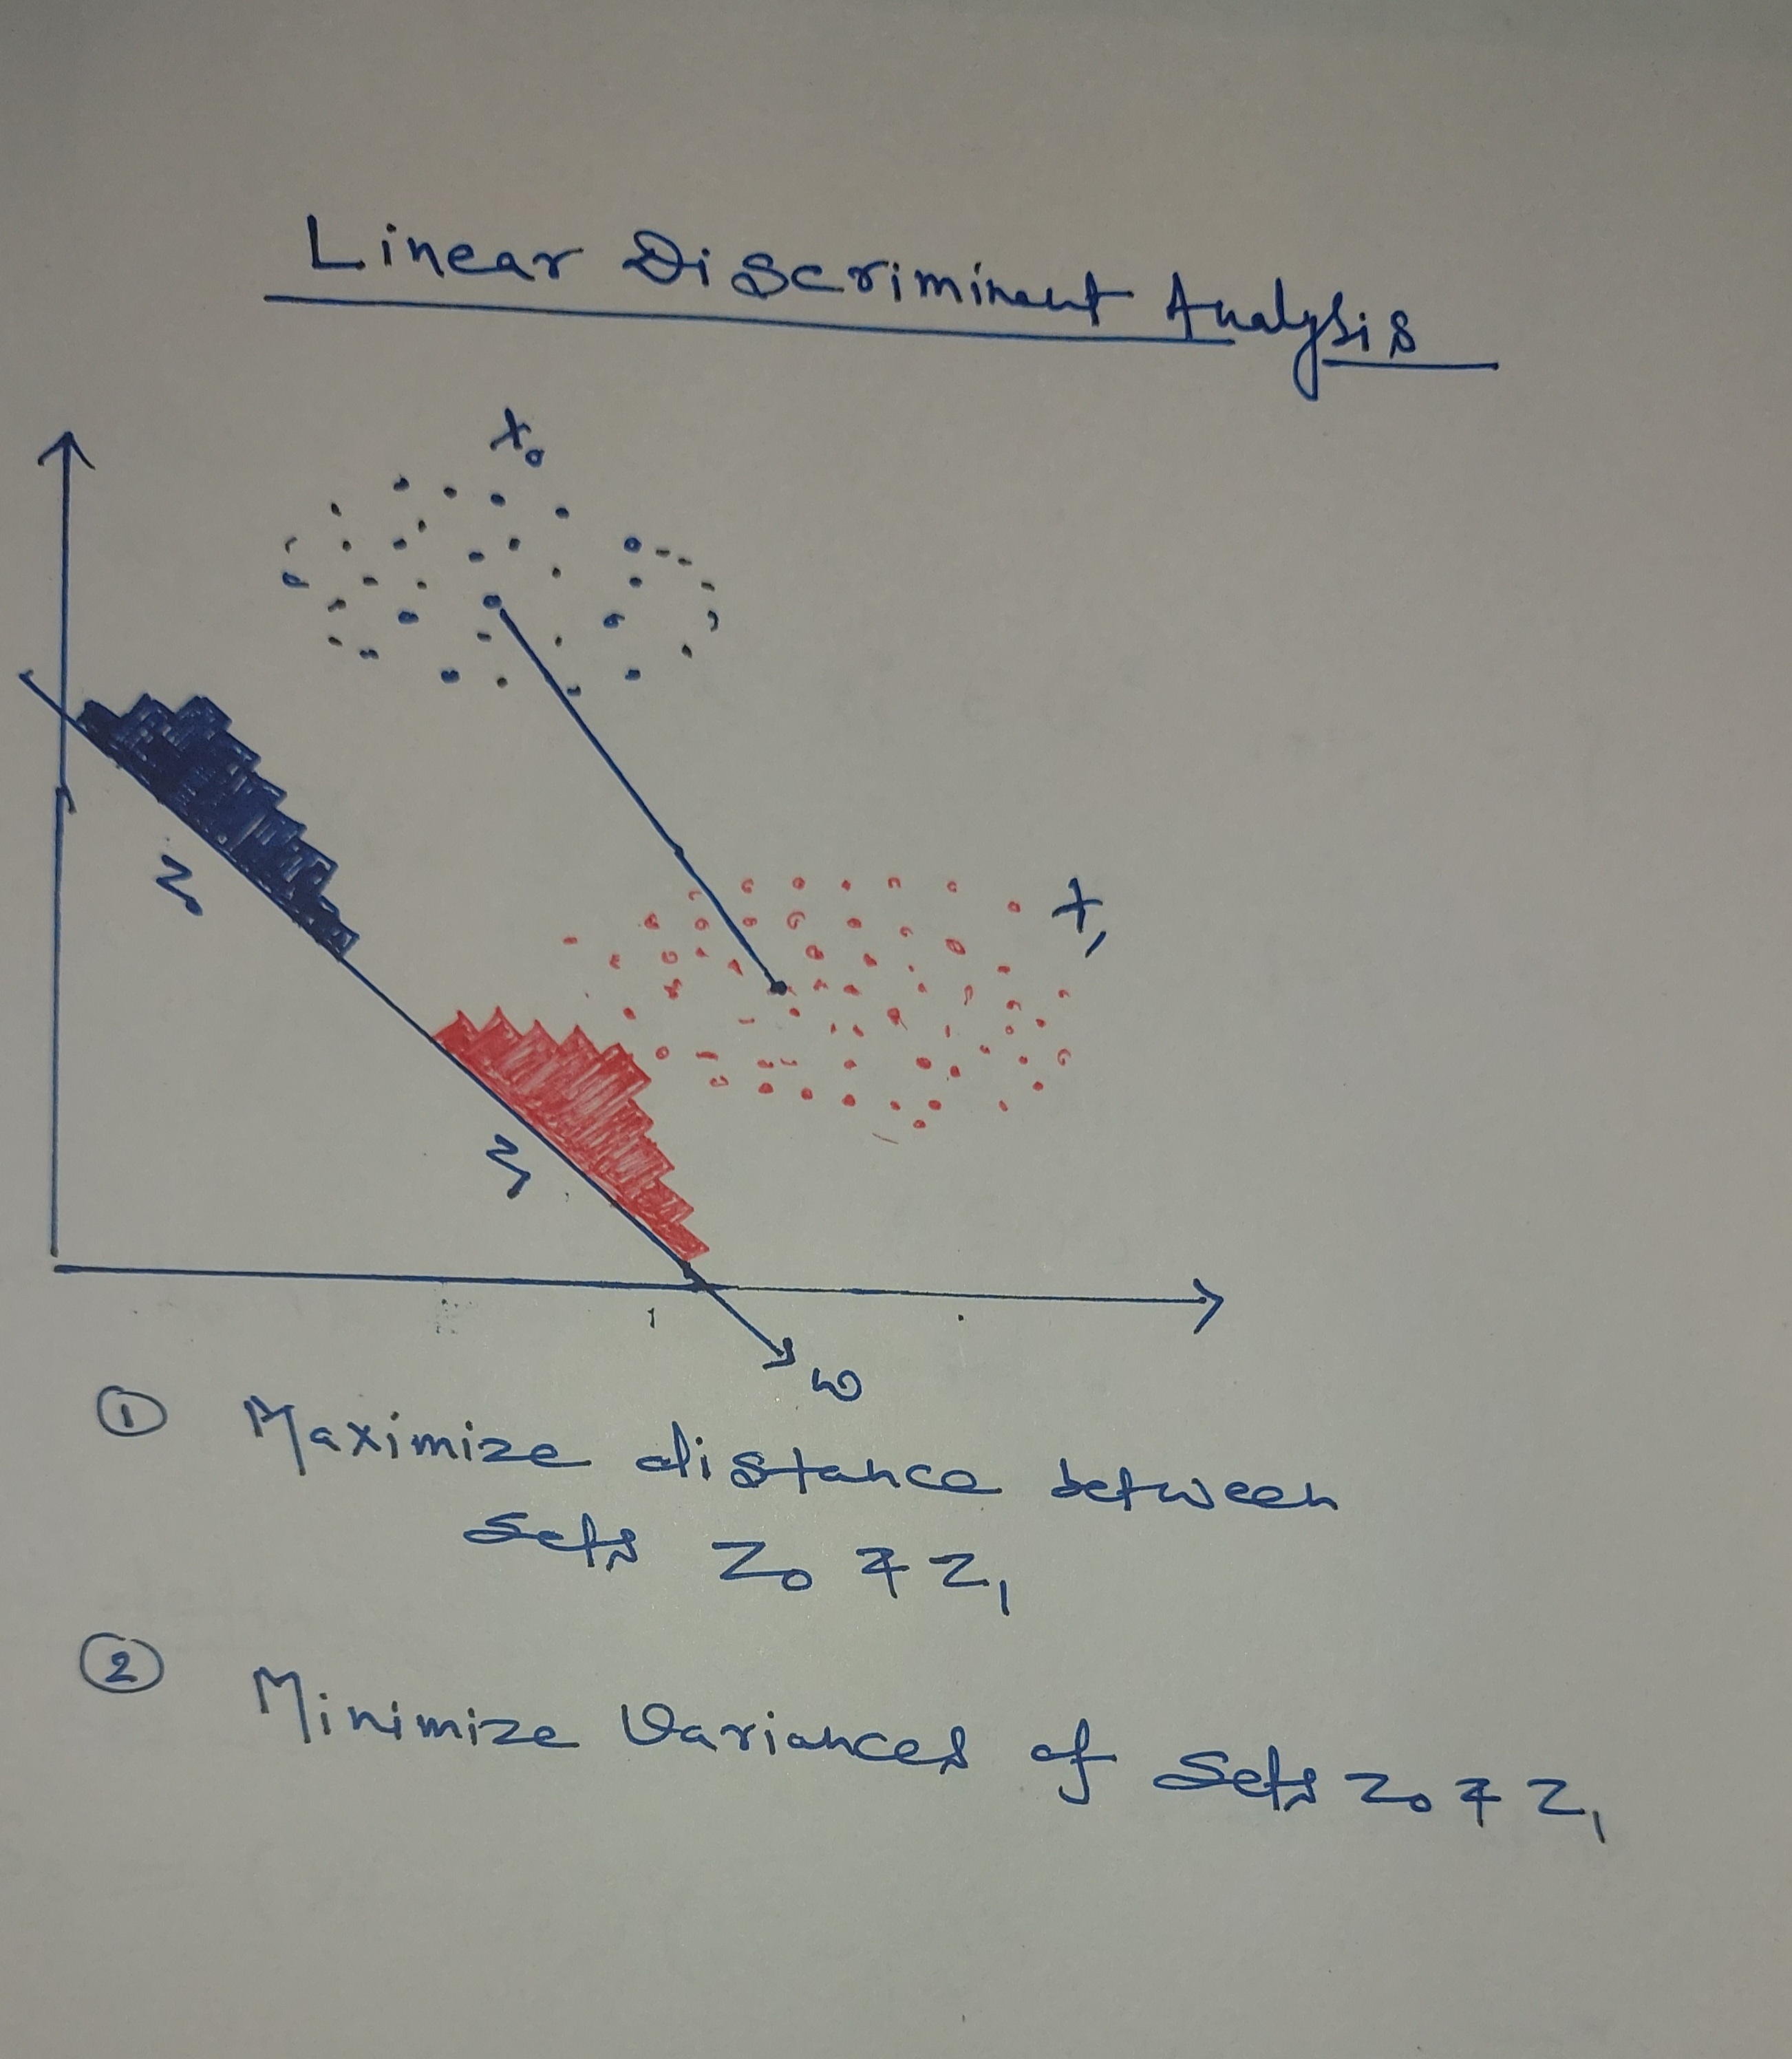

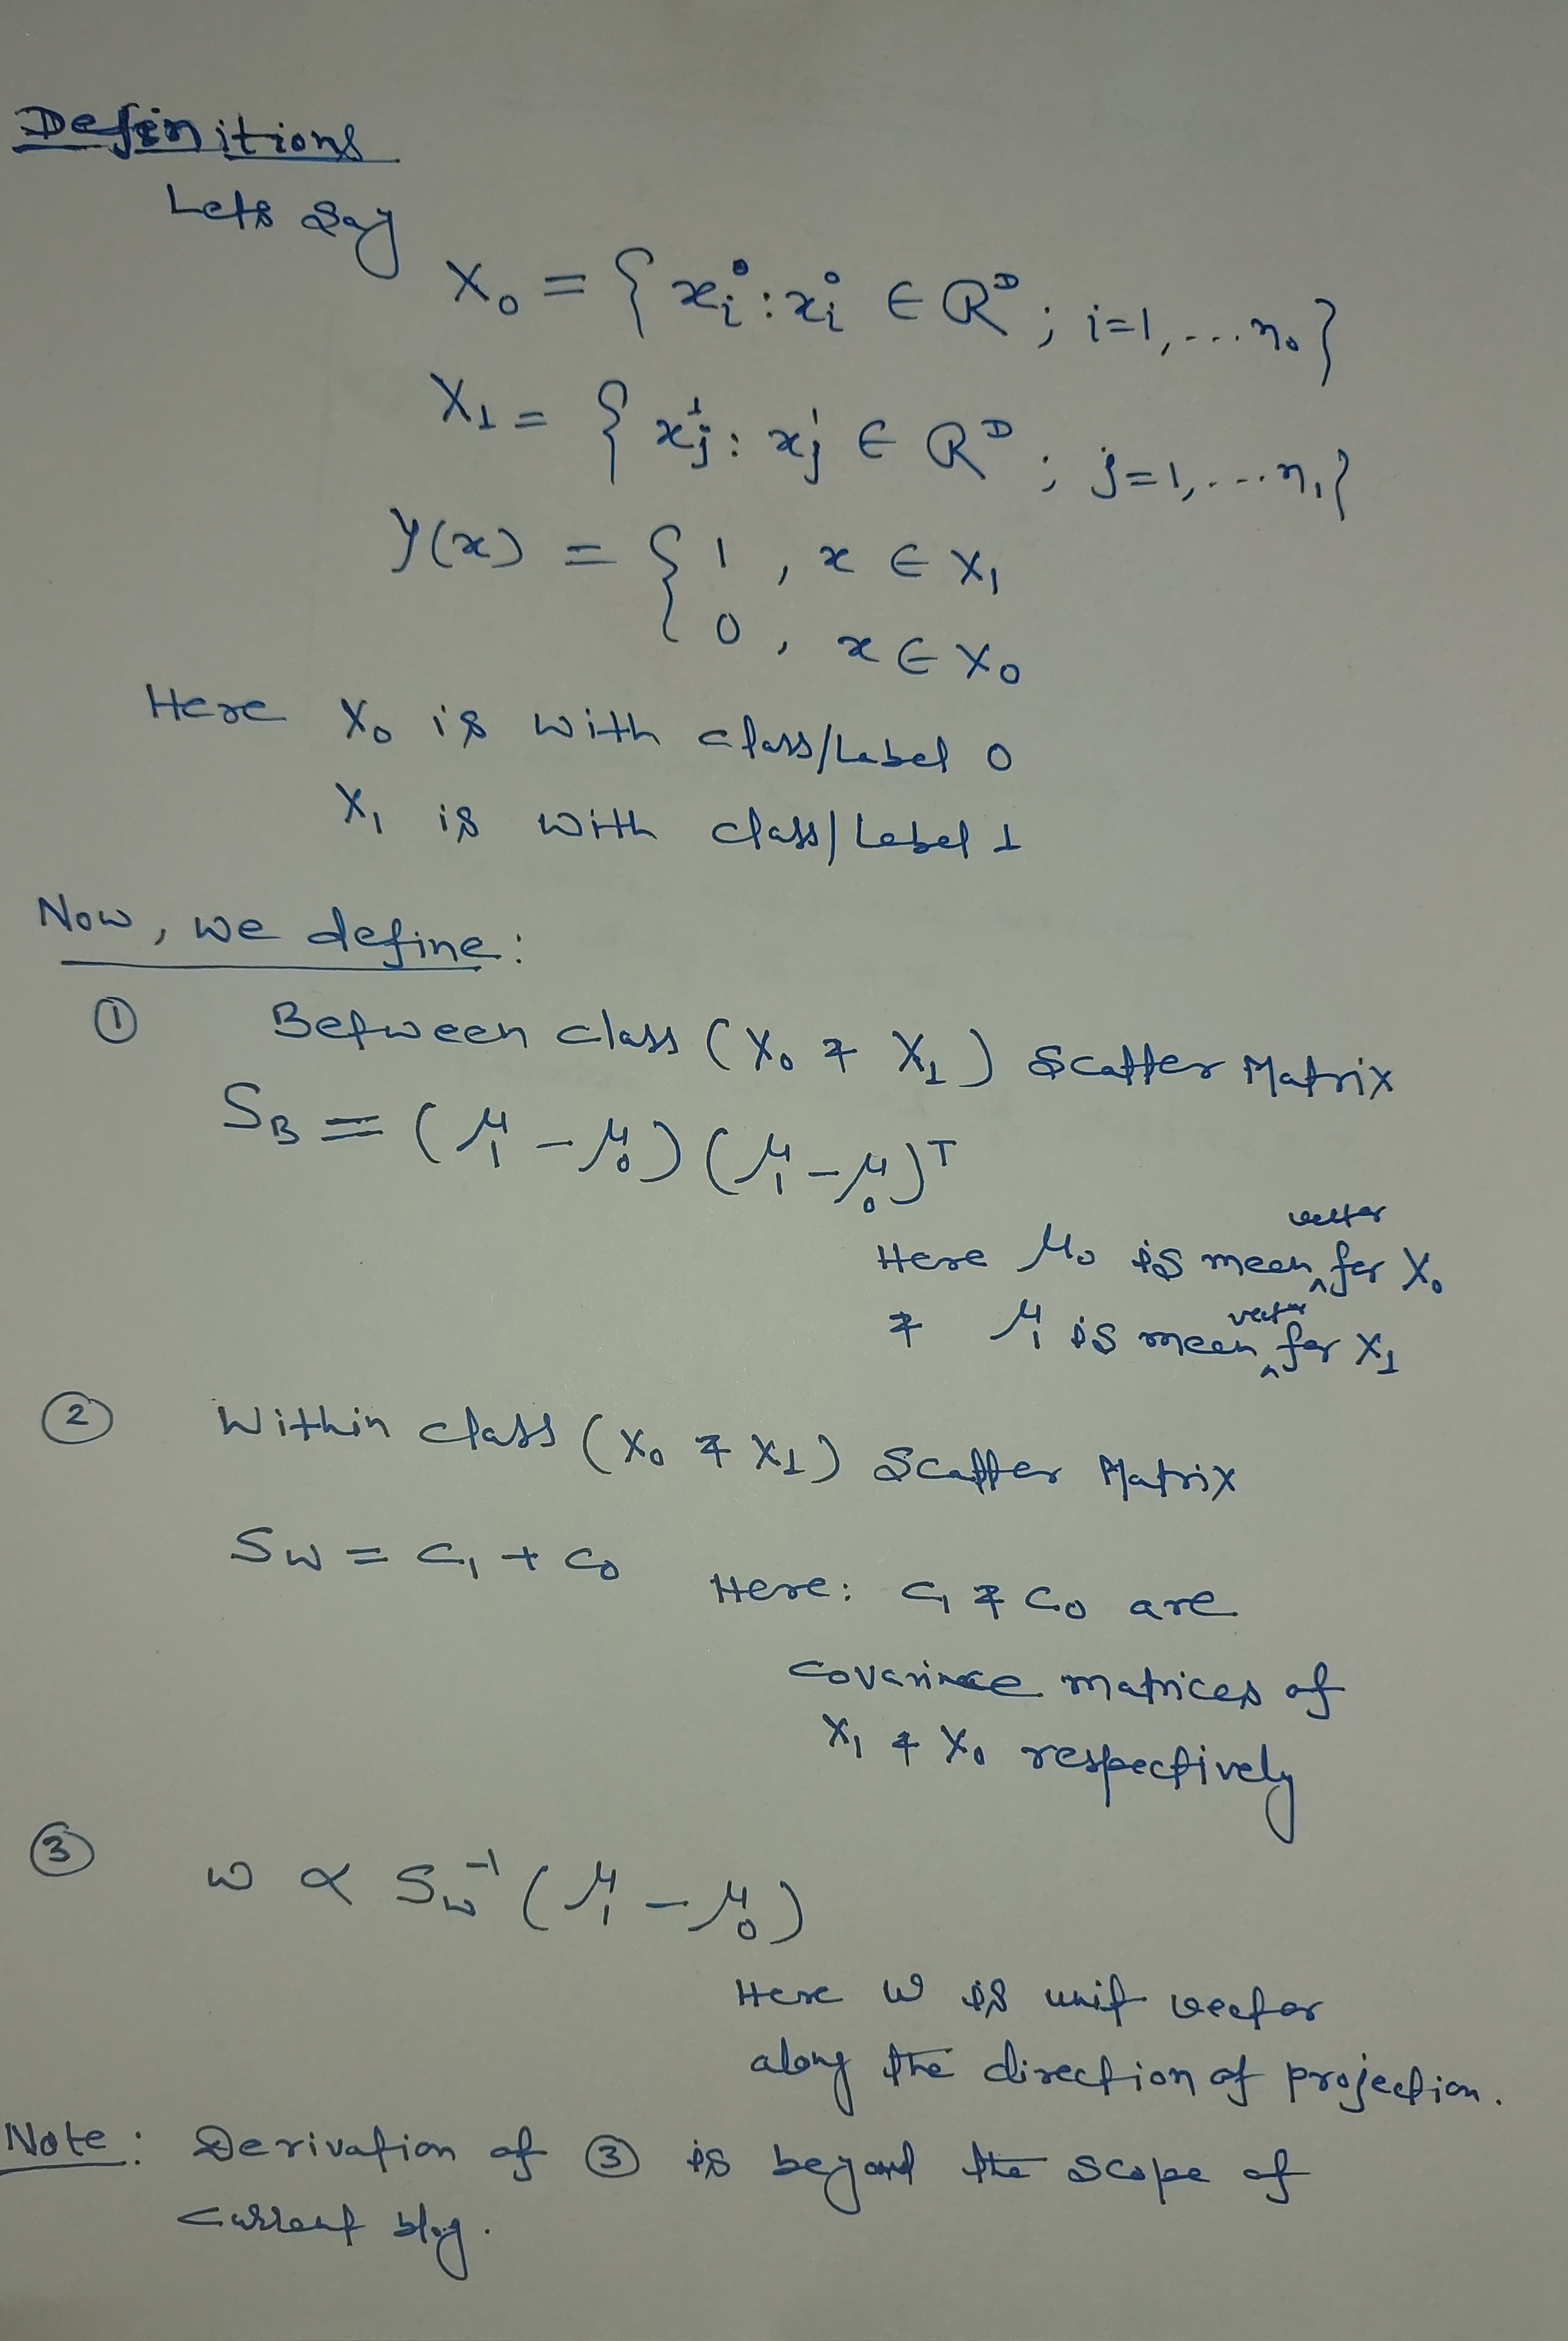

<div class="alert alert-block alert-success"> 
    <span ><b>Steps:</b></span>
    
1. Load Wine data set 
    
2. Compute centroids/means and covariance matrices of both arrays
    
3. Compute the optimal direction vector w^ (unit vector) for LDA.
    
4. Project the vector data in arrays to generate the respective array of scalars zN and zS. 
    
5. Plot the normalized histograms of zN and zS in two different colors.
</div>

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt

In [2]:
wine_info = load_wine()
X, y = wine_info.data, wine_info.target

<div class="alert alert-block alert-success">For current LDA demo we are taking only class1 and class 2 data samples and dropping class 3 data smaples. </div>

In [3]:
S = np.array([X[i] for i in range(len(y)) if y[i]==1])
N = np.array([X[i] for i in range(len(y)) if y[i]==2])
S.shape, N.shape

((71, 13), (48, 13))

In [4]:
print(N[0:2,:])  
print(S[0:2,:])  

[[1.286e+01 1.350e+00 2.320e+00 1.800e+01 1.220e+02 1.510e+00 1.250e+00
  2.100e-01 9.400e-01 4.100e+00 7.600e-01 1.290e+00 6.300e+02]
 [1.288e+01 2.990e+00 2.400e+00 2.000e+01 1.040e+02 1.300e+00 1.220e+00
  2.400e-01 8.300e-01 5.400e+00 7.400e-01 1.420e+00 5.300e+02]]
[[1.237e+01 9.400e-01 1.360e+00 1.060e+01 8.800e+01 1.980e+00 5.700e-01
  2.800e-01 4.200e-01 1.950e+00 1.050e+00 1.820e+00 5.200e+02]
 [1.233e+01 1.100e+00 2.280e+00 1.600e+01 1.010e+02 2.050e+00 1.090e+00
  6.300e-01 4.100e-01 3.270e+00 1.250e+00 1.670e+00 6.800e+02]]


<div class="alert alert-block alert-success"> Compute centroids and covariance matrices of both arrays. </div>

In [5]:

# computing centroids
N_mu = np.mean(N,axis=0)
S_mu = np.mean(S,axis=0)
print(N_mu.shape,S_mu.shape)

(13,) (13,)


In [6]:
#computing covariance matrices for N
N_cov = np.cov(N.T,bias=True)
print(N_cov)
print(N_cov.shape)

[[ 2.7530e-01  6.2394e-02  2.3501e-02  2.4615e-01 -4.7576e-01  3.8988e-02
   1.1595e-02  2.4594e-03  7.9930e-02  4.2039e-01 -2.0289e-03  1.8670e-02
  -5.3215e+00]
 [ 6.2394e-02  1.1589e+00  3.5526e-03  2.0458e-01 -2.0299e+00 -6.1114e-02
  -8.8035e-02  1.8878e-02 -9.7313e-02 -3.9930e-01  9.7169e-03  2.0888e-03
   3.5664e-01]
 [ 2.3501e-02  3.5526e-03  3.3400e-02  3.0976e-01  4.1612e-01  3.0369e-02
   1.4708e-02 -4.5729e-04  1.4331e-02  5.2304e-02  3.7350e-03  1.1092e-02
  -3.0659e+00]
 [ 2.4615e-01  2.0458e-01  3.0976e-01  4.9931e+00  3.8385e+00  2.8771e-01
   1.7616e-01 -4.6875e-03  2.3811e-01  8.2073e-01  6.9965e-03  2.5087e-02
  -2.5113e+01]
 [-4.7576e-01 -2.0299e+00  4.1612e-01  3.8385e+00  1.1613e+02 -1.5086e-01
   1.7802e+00 -6.6943e-01  6.6931e-01  2.5676e+00  5.6120e-03 -6.4715e-01
   2.3305e+02]
 [ 3.8988e-02 -6.1114e-02  3.0369e-02  2.8771e-01 -1.5086e-01  1.2477e-01
   2.4510e-02  1.4159e-02  8.8594e-02  2.7130e-01 -1.0445e-03  1.9065e-02
   1.7270e+00]
 [ 1.1595e-02 -8.8035e

In [7]:
#computing covariance matrices for S
S_cov = np.cov(S.T,bias=True)
print(S_cov)
print(S_cov.shape)

[[ 2.8533e-01 -1.1506e-02 -3.5949e-02 -9.9994e-02 -2.6578e-01 -1.3399e-02
  -1.4316e-02 -4.4813e-03 -6.0550e-02  1.3235e-01 -2.1936e-04 -3.4321e-02
   3.5999e+00]
 [-1.1506e-02  1.0169e+00  4.6972e-02  7.9800e-01 -1.2881e+00  2.1537e-02
   7.9091e-02  1.5838e-02  1.2692e-01 -1.8824e-01 -8.2900e-02  7.8477e-02
  -3.5294e+01]
 [-3.5949e-02  4.6972e-02  9.8118e-02  7.2437e-01  6.7286e-01  1.9022e-02
   6.9126e-02  1.1557e-02  8.0437e-03  1.7332e-02 -1.9721e-03  2.4803e-02
   2.0517e+00]
 [-9.9994e-02  7.9800e-01  7.2437e-01  1.1063e+01  1.8052e-01  2.3044e-01
   7.2566e-01  7.4762e-02  2.1641e-01 -2.6228e-01 -5.1490e-02  6.2660e-01
  -7.5320e+00]
 [-2.6578e-01 -1.2881e+00  6.7286e-01  1.8052e-01  2.7673e+02  6.3132e-01
   1.9677e-02 -3.9750e-01  2.9614e+00  6.7115e-01  4.1844e-01 -6.2491e-01
   1.2973e+03]
 [-1.3399e-02  2.1537e-02  1.9022e-02  2.3044e-01  6.3132e-01  2.9323e-01
   2.9255e-01 -2.8310e-02  1.2385e-01  8.4082e-02  4.3302e-03  1.2940e-01
   1.4309e+00]
 [-1.4316e-02  7.9091e

<div class="alert alert-block alert-success"> computing mean differences. </div>

In [8]:
mudiff = N_mu - S_mu
print(mudiff.shape)
print(mudiff)

(13,)
[ 8.7502e-01  1.4011e+00  1.9229e-01  1.1786e+00  4.7632e+00 -5.8012e-01
 -1.2994e+00  8.3838e-02 -4.7674e-01  4.3096e+00 -3.7357e-01 -1.1018e+00
  1.1039e+02]


<div class="alert alert-block alert-success"> Compute SW matix and SW inverse .</div>

In [9]:
Sw = N_cov + S_cov
print(Sw)
SW_inv = np.linalg.inv(Sw)
print(SW_inv.shape)

[[ 5.6063e-01  5.0888e-02 -1.2448e-02  1.4615e-01 -7.4154e-01  2.5589e-02
  -2.7213e-03 -2.0219e-03  1.9380e-02  5.5274e-01 -2.2483e-03 -1.5651e-02
  -1.7215e+00]
 [ 5.0888e-02  2.1757e+00  5.0524e-02  1.0026e+00 -3.3180e+00 -3.9577e-02
  -8.9439e-03  3.4716e-02  2.9607e-02 -5.8754e-01 -7.3183e-02  8.0566e-02
  -3.4937e+01]
 [-1.2448e-02  5.0524e-02  1.3152e-01  1.0341e+00  1.0890e+00  4.9392e-02
   8.3834e-02  1.1100e-02  2.2375e-02  6.9635e-02  1.7629e-03  3.5894e-02
  -1.0143e+00]
 [ 1.4615e-01  1.0026e+00  1.0341e+00  1.6056e+01  4.0191e+00  5.1815e-01
   9.0182e-01  7.0075e-02  4.5452e-01  5.5845e-01 -4.4493e-02  6.5169e-01
  -3.2645e+01]
 [-7.4154e-01 -3.3180e+00  1.0890e+00  4.0191e+00  3.9286e+02  4.8046e-01
   1.7998e+00 -1.0669e+00  3.6307e+00  3.2388e+00  4.2405e-01 -1.2721e+00
   1.5304e+03]
 [ 2.5589e-02 -3.9577e-02  4.9392e-02  5.1815e-01  4.8046e-01  4.1800e-01
   3.1706e-01 -1.4151e-02  2.1244e-01  3.5538e-01  3.2856e-03  1.4847e-01
   3.1578e+00]
 [-2.7213e-03 -8.9439e

<div class="alert alert-block alert-success"> Compute SW matix and SW inverse .</div>

In [10]:
u = SW_inv @ mudiff
Wcap = u / np.linalg.norm(u)  # unit vector for LDA

print(Wcap.shape)

(13,)


<div class="alert alert-block alert-success"> Project the vector data in arrays N and S to generate the respective array of scalars zN and zS.</div>

In [11]:
zN = N @ Wcap.T
zS = S @ Wcap.T

print(zN.shape, zS.shape)

(48,) (71,)


<div class="alert alert-block alert-success">Plot the normalized histograms of zN and zS in two different colors. </div>

(array([ 3.,  2.,  4., 19., 16., 12.,  5.,  4.,  3.,  3.]),
 array([-0.5838, -0.4323, -0.2808, -0.1293,  0.0223,  0.1738,  0.3253,
         0.4768,  0.6283,  0.7798,  0.9314]),
 <BarContainer object of 10 artists>)

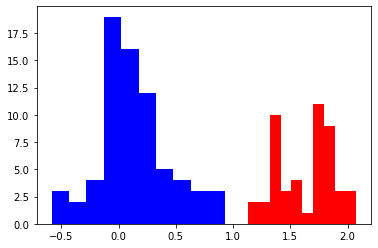

In [12]:
plt.hist(zN,color='r')
plt.hist(zS,color='b')

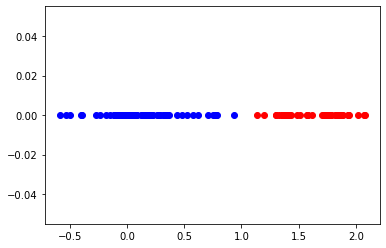

In [13]:
plt.scatter(zN,np.zeros(len(zN)),c='r')
plt.scatter(zS,np.zeros(len(zS)),c='b')

Refer github for code - https://github.com/ShawPramod/Dimentionality-Reduction-LDA-simple 